In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library  
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

/Users/nicolasdalessandro/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


ModuleNotFoundError: No module named 'xgboost'

In [2]:
path = r"C:\Users\David\ML\titanic"

In [3]:
train = pd.read_csv(path+'/train.csv')

In [4]:
test = pd.read_csv(path+'/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# check missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(12)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [8]:
# check missing data
total = test.isnull().sum().sort_values(ascending = False)
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(11)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [9]:
#We assume NaN cabin means cheap ticket with no cabin -> therefore impute to non

# Imputation
my_imputer = SimpleImputer(strategy="constant",fill_value="non")
X_train_cabin = pd.DataFrame(my_imputer.fit_transform(train[["Cabin"]]))
X_test_cabin = pd.DataFrame(my_imputer.transform(test[["Cabin"]]))
X_train_cabin.columns = ["CabinImputed"]
X_test_cabin.columns = ["CabinImputed"]
X_train = pd.concat([X_train_cabin, train], axis=1)
X_test = pd.concat([X_test_cabin, test], axis=1)

In [10]:
#We assume NaN embarkation means polizaontes -> therefore impute to P

# Imputation
my_imputer = SimpleImputer(strategy="constant",fill_value="P")
X_train_embarked = pd.DataFrame(my_imputer.fit_transform(train[["Embarked"]]))
X_test_embarked = pd.DataFrame(my_imputer.transform(test[["Embarked"]]))
X_train_embarked.columns = ["EmbarkedImputed"]
X_test_embarked.columns = ["EmbarkedImputed"]
X_train = pd.concat([X_train_embarked, X_train], axis=1)
X_test = pd.concat([X_test_embarked, X_test], axis=1)

In [11]:
data_cleaner = [X_train, X_test]

In [12]:
#Fill age and fare NaN with median
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [13]:
X_test.head()

,EmbarkedImputed,CabinImputed,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Q,non,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,S,non,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,Q,non,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,S,non,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,S,non,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
label_encoder = LabelEncoder()
X_train["EmbarkedImputed"] = label_encoder.fit_transform(X_train["EmbarkedImputed"])
X_test["EmbarkedImputed"] = label_encoder.transform(X_test["EmbarkedImputed"])
X_train["Sex"] = label_encoder.fit_transform(X_train["Sex"])
X_test["Sex"] = label_encoder.transform(X_test["Sex"])

In [15]:
X_test.head()

,EmbarkedImputed,CabinImputed,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,non,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,3,non,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,2,non,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,3,non,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,3,non,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

In [17]:
X_train.head()

,EmbarkedImputed,CabinImputed,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,3,non,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,0,C85,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,non,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,3,C123,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0
4,3,non,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1


In [18]:
X_train.head()

,EmbarkedImputed,CabinImputed,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,3,non,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,0,C85,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,non,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,3,C123,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0
4,3,non,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1


In [19]:
###CREATE: Feature Engineering for cabin levels
for dataset in data_cleaner:    
    #Discrete variables

    dataset['CabinLvl'] = 0
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('A', regex=False)] = 1
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('B', regex=False)] = 2
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('C', regex=False)] = 3
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('D', regex=False)] = 4
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('E', regex=False)] = 5
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('F', regex=False)] = 6
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('G', regex=False)] = 7
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('H', regex=False)] = 8
    dataset['CabinLvl'].loc[dataset['CabinImputed'].str.contains('I', regex=False)] = 9    

In [20]:
#delete treated columns
drop_column = ['PassengerId','Cabin', 'Ticket',"Embarked","Name","CabinImputed"]
X_train.drop(drop_column, axis=1, inplace = True)
X_test.drop(drop_column, axis=1, inplace = True)

In [21]:
X_train.head()

,EmbarkedImputed,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,CabinLvl
0,3,0,3,1,22.0,1,0,7.2500,2,0,0
1,0,1,1,0,38.0,1,0,71.2833,2,0,3
2,3,1,3,0,26.0,0,0,7.9250,1,1,0
3,3,1,1,0,35.0,1,0,53.1000,2,0,3
4,3,0,3,1,35.0,0,0,8.0500,1,1,0


In [22]:
X_test.head()

,EmbarkedImputed,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,CabinLvl
0,2,3,1,34.5,0,0,7.8292,1,1,0
1,3,3,0,47.0,1,0,7.0000,2,0,0
2,2,2,1,62.0,0,0,9.6875,1,1,0
3,3,3,1,27.0,0,0,8.6625,1,1,0
4,3,3,0,22.0,1,1,12.2875,3,0,0


In [23]:
# Separate X from Y
y = X_train.Survived
X = X_train.drop("Survived",axis = 1 )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

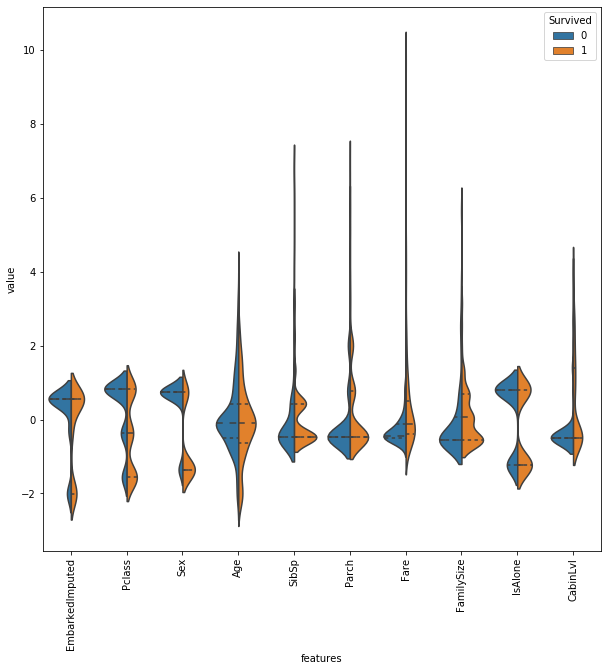

In [24]:
# Viz
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Survived",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Survived", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

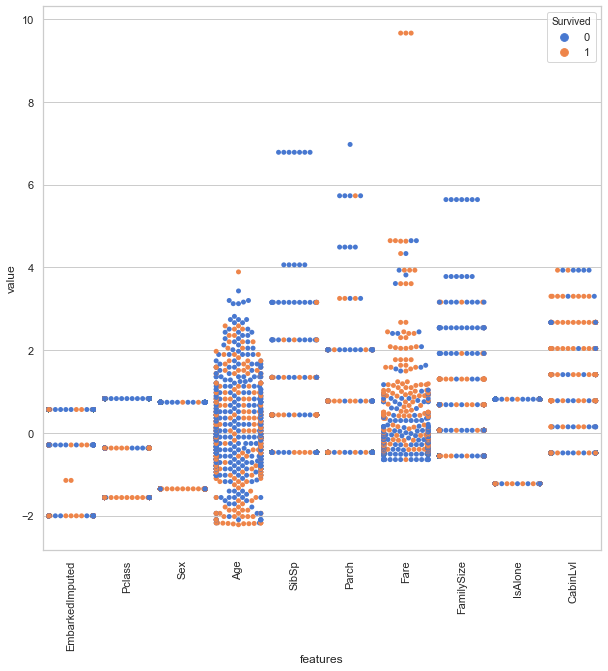

In [25]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Survived",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Survived", data=data)

plt.xticks(rotation=90)

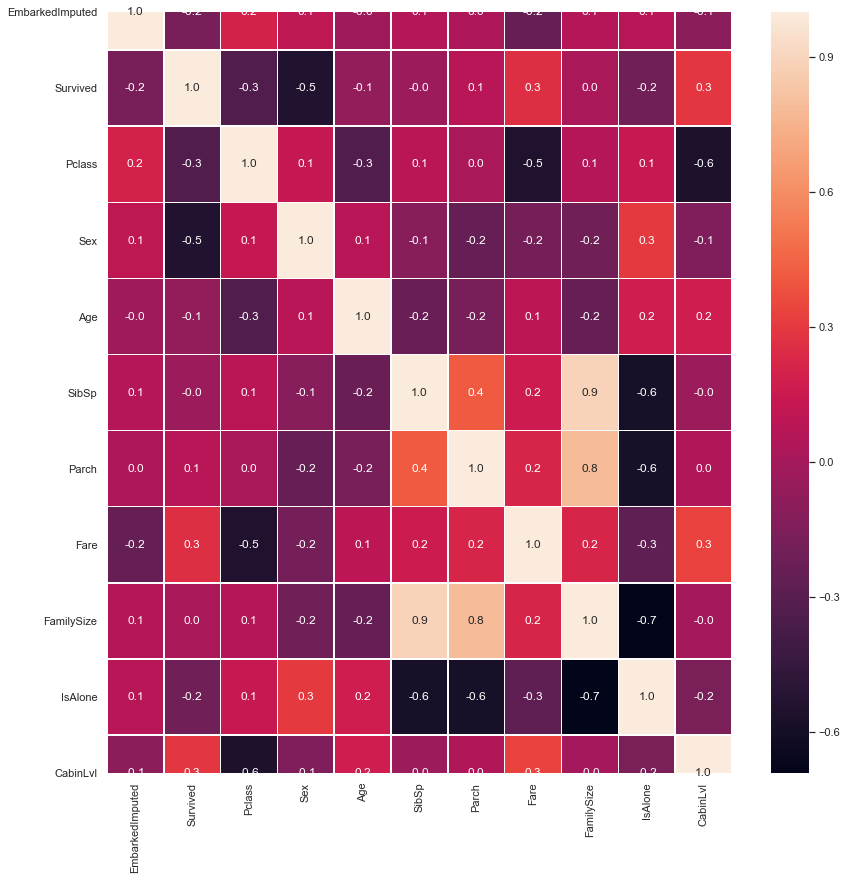

In [26]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [27]:
X_train.head()

,EmbarkedImputed,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,CabinLvl
0,3,0,3,1,22.0,1,0,7.2500,2,0,0
1,0,1,1,0,38.0,1,0,71.2833,2,0,3
2,3,1,3,0,26.0,0,0,7.9250,1,1,0
3,3,1,1,0,35.0,1,0,53.1000,2,0,3
4,3,0,3,1,35.0,0,0,8.0500,1,1,0


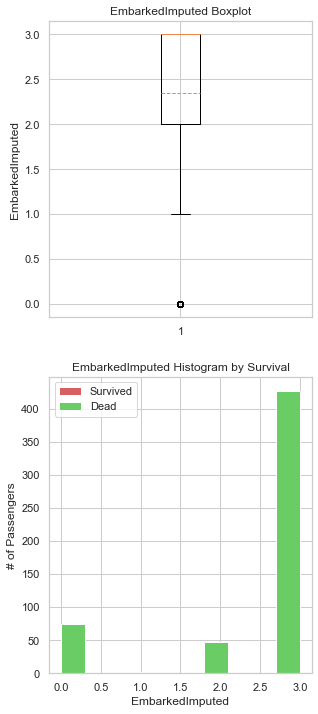

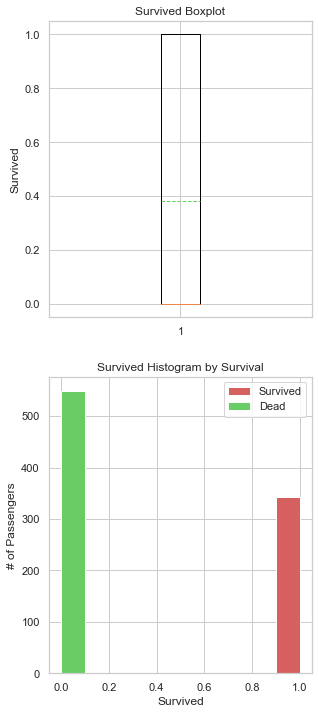

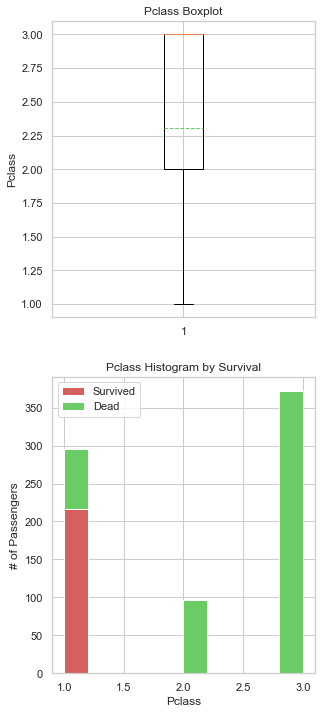

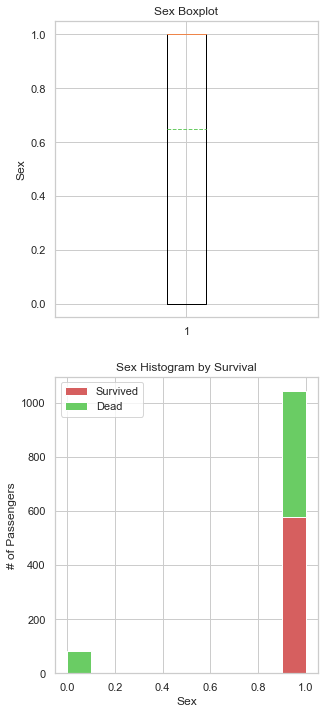

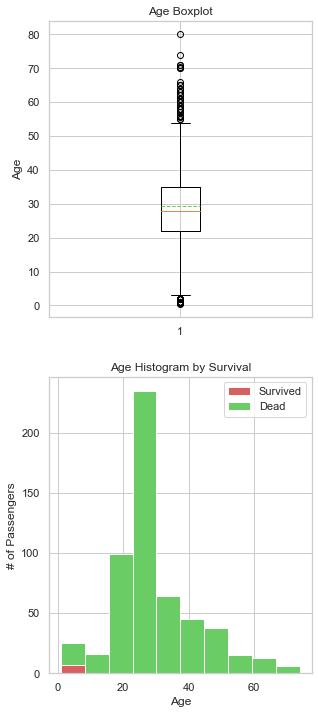

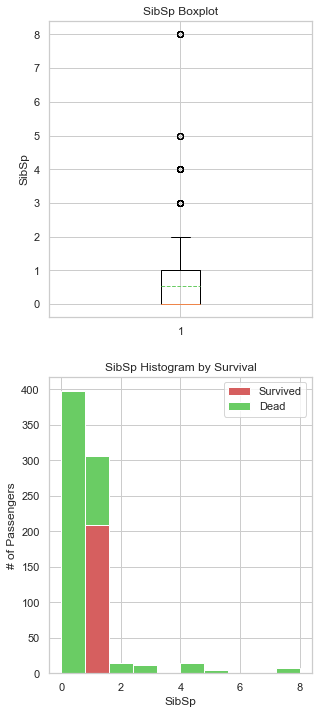

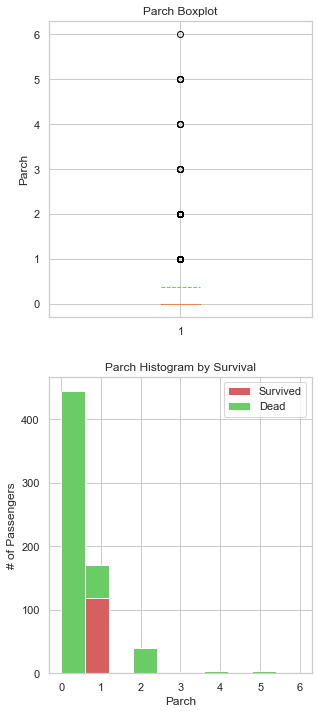

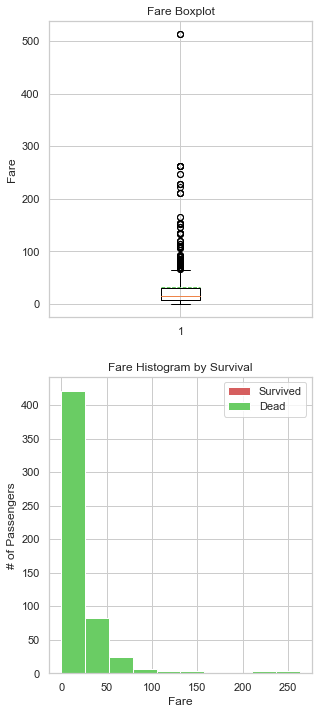

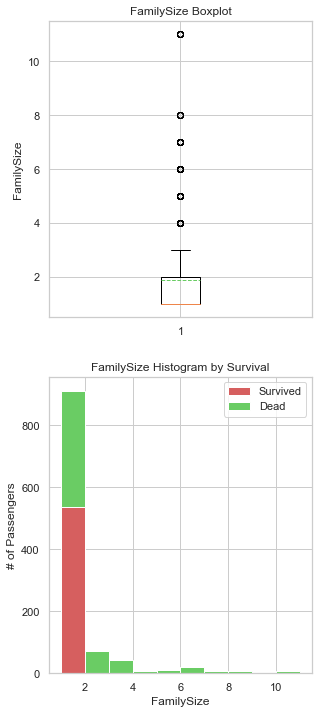

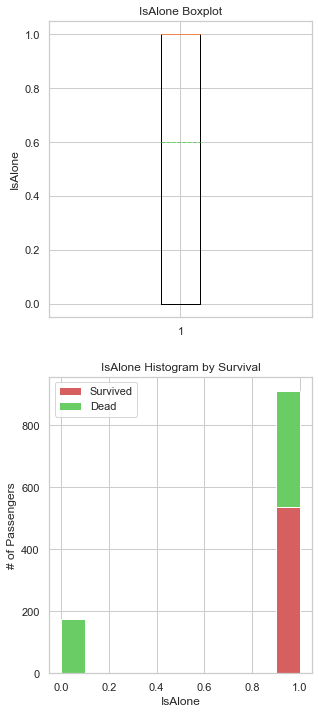

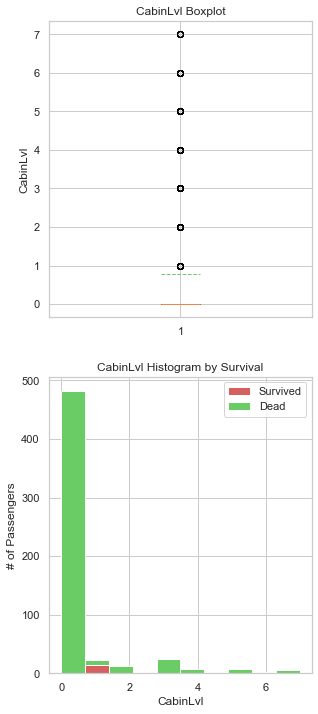

In [28]:
#graph distribution of quantitative data

for col in X_train.columns:
    plt.figure(figsize=[16,12])
    
    plt.subplot(231)
    plt.boxplot(x=X_train[col], showmeans = True, meanline = True)
    plt.title(col+" Boxplot")
    plt.ylabel(col)
    
    plt.subplot(234)
    plt.hist(x = [X_train[X_train[col]==1][col], X_train[X_train['Survived']==0][col]], 
         stacked=True, color = ['r','g'],label = ['Survived','Dead'])
    plt.title(col+' Histogram by Survival')
    plt.xlabel(col)
    plt.ylabel('# of Passengers')
    plt.legend()





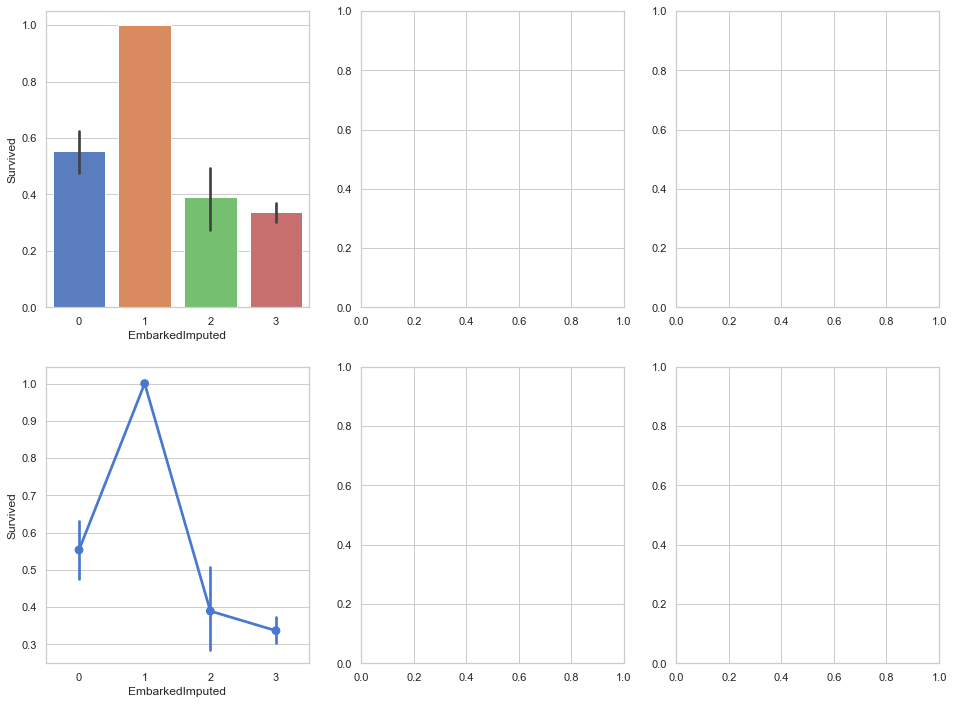

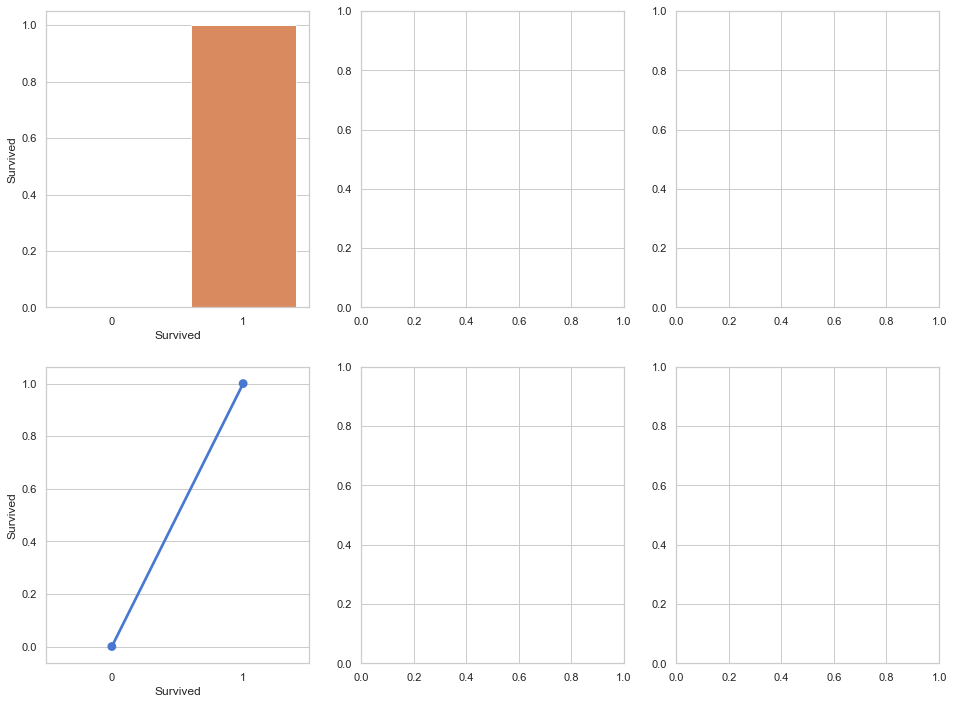

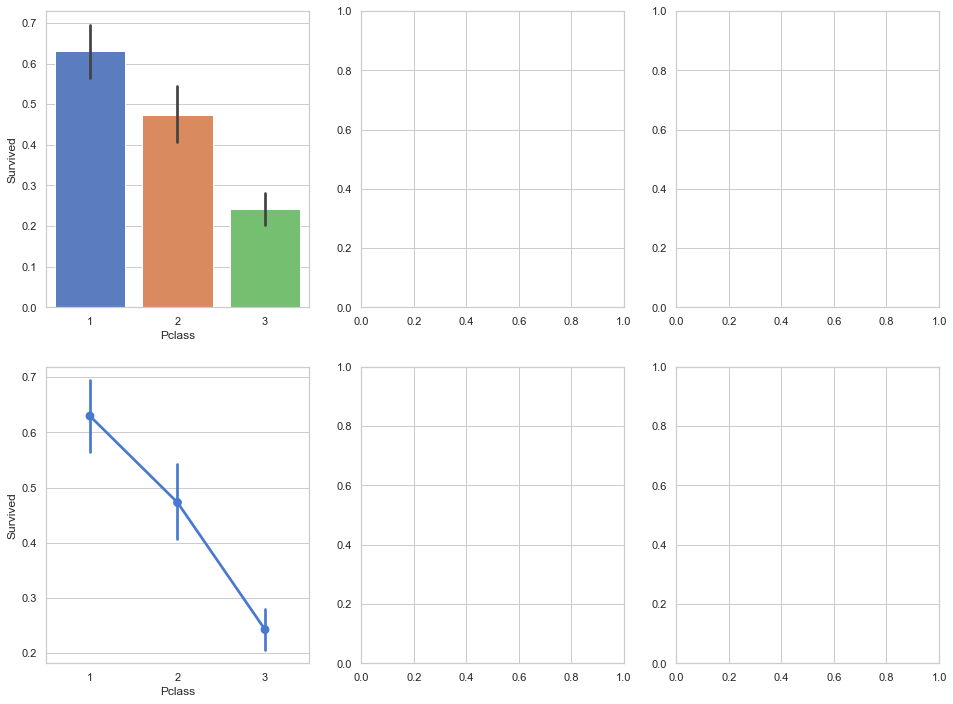

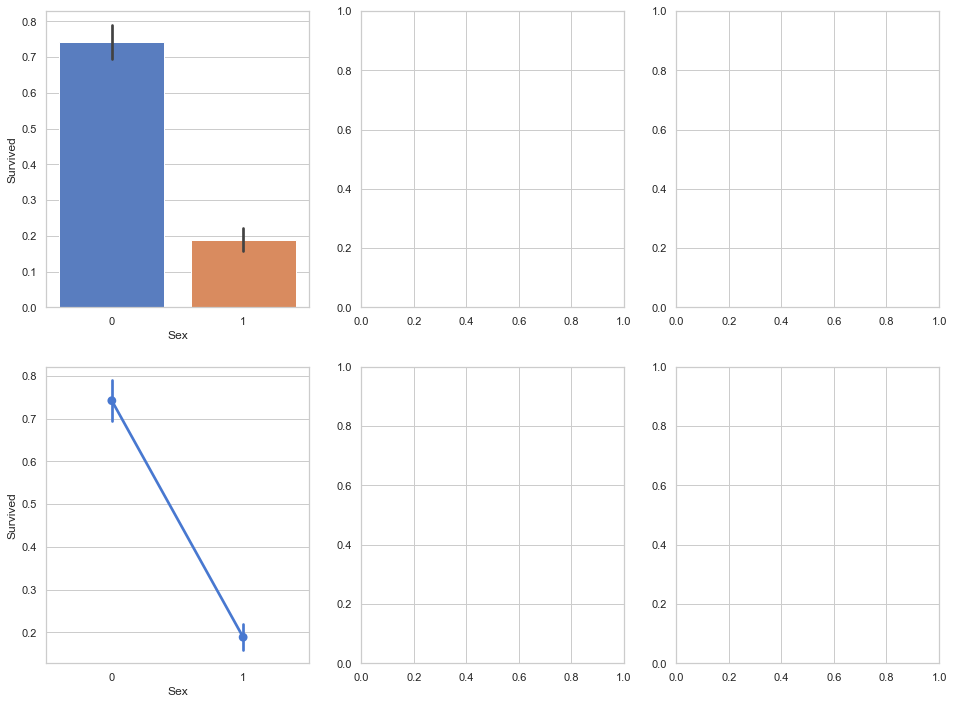

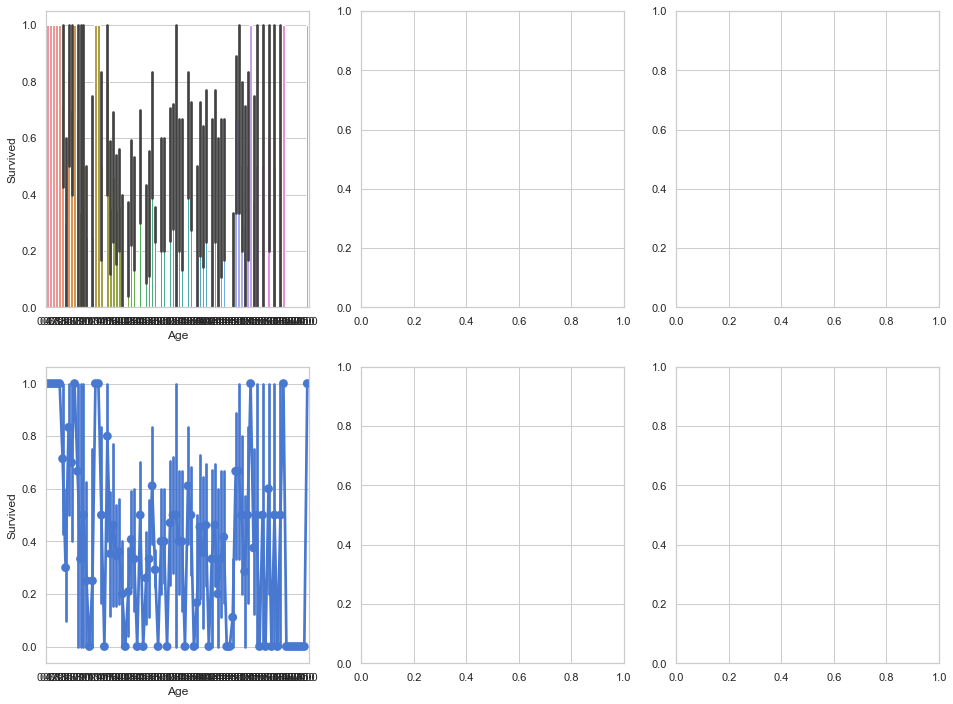

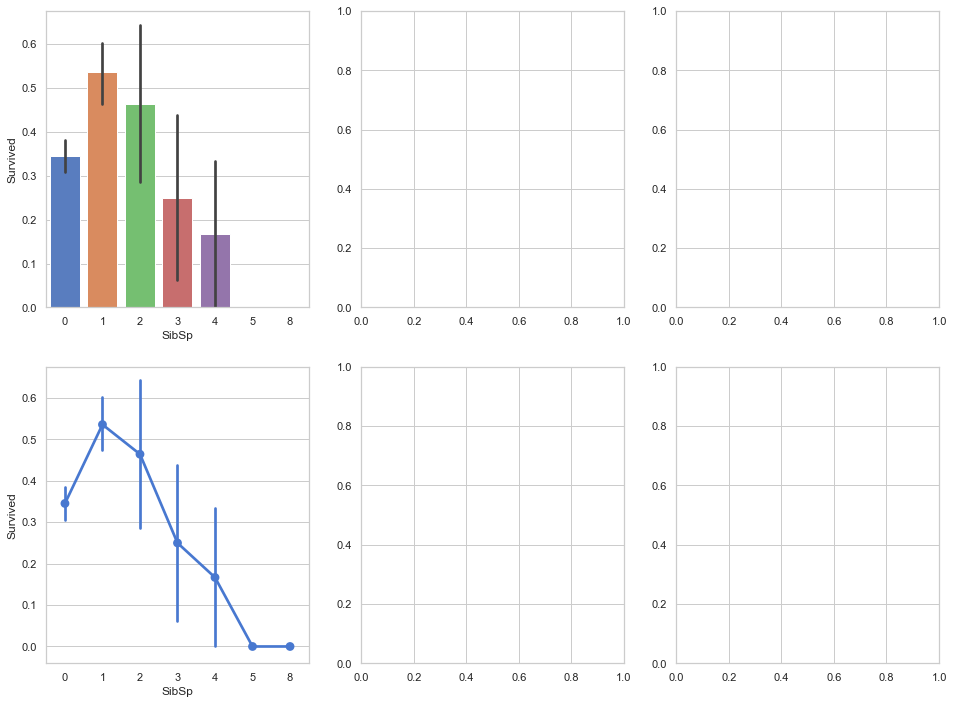

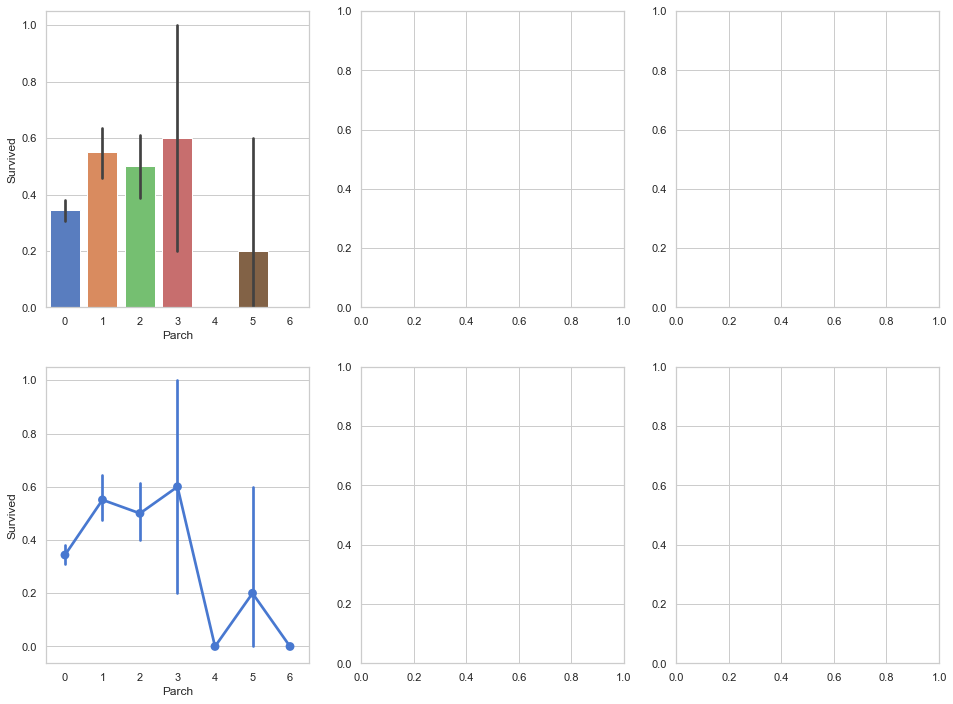

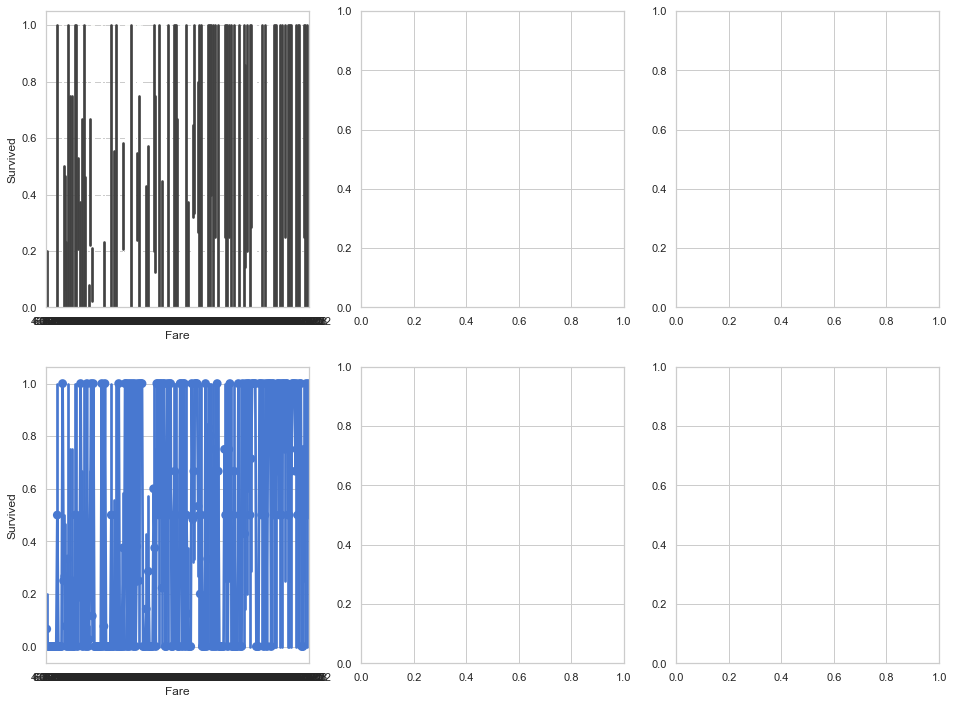

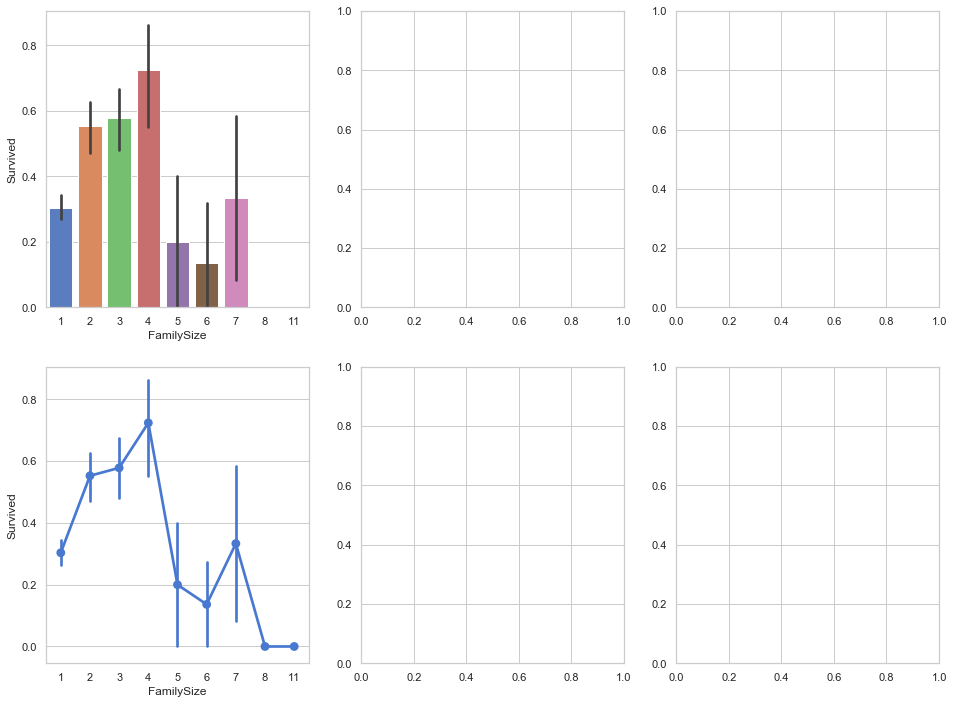

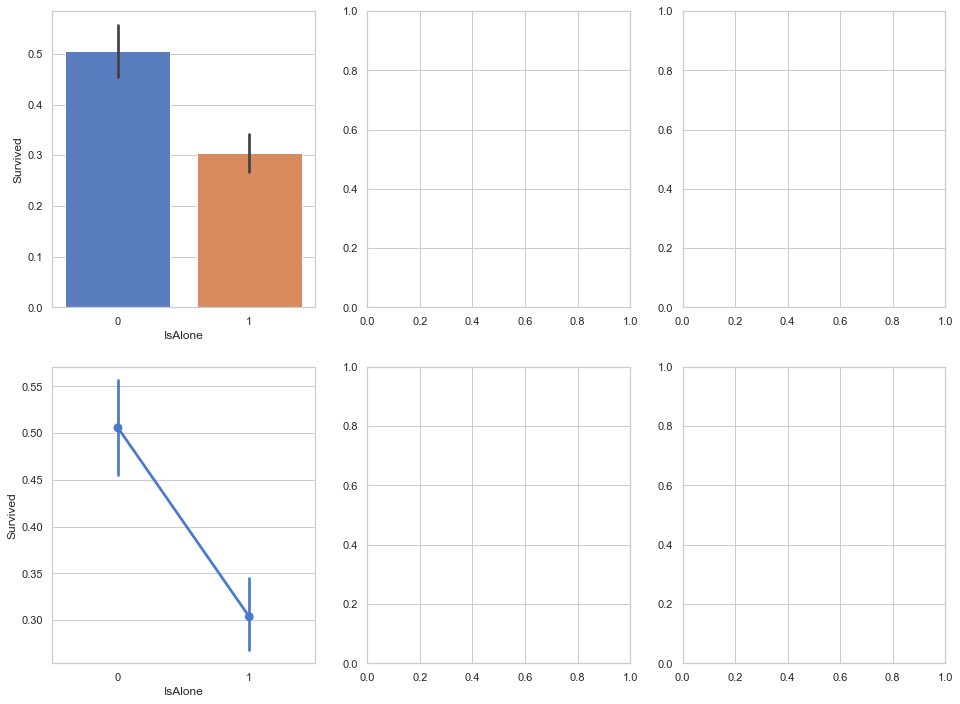

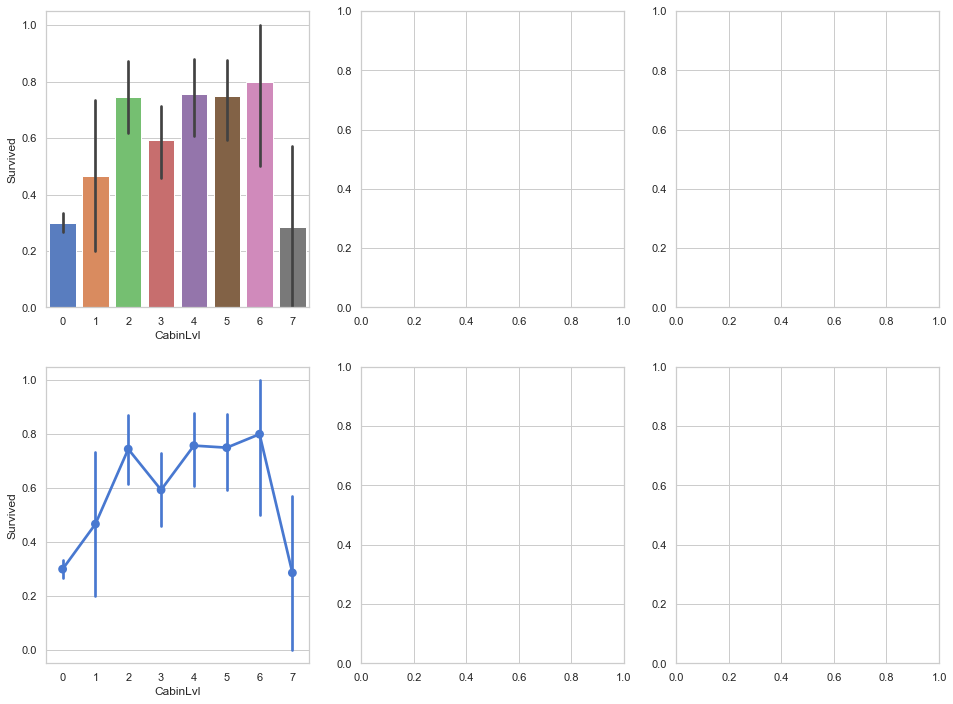

In [29]:
#graph individual features by survival

for col in X_train.columns:
    fig, saxis = plt.subplots(2, 3,figsize=(16,12))
    
    sns.barplot(x = col, y = 'Survived', data=X_train, ax = saxis[0,0])
    sns.pointplot(x = col, y = 'Survived',  data=X_train, ax = saxis[1,0])


In [30]:
#search outliers
epsilon = 50
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_train)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [32]:
X_train['Outlier']=0
for i in range(888):    
    #tag outliers
    X_train['Outlier'][i] = labels[i]


In [33]:
X_train[X_train["Outlier"]==-1]

,EmbarkedImputed,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,CabinLvl,Outlier
258,0,1,1,0,35.0,0,0,512.3292,1,1,0,-1
679,0,1,1,1,36.0,0,1,512.3292,2,0,2,-1
737,0,1,1,1,35.0,0,0,512.3292,1,1,2,-1


In [34]:
#Correct outliers
X["Fare"][258]=51.23292
X["Fare"][679]=51.23292
X["Fare"][737]=51.23292
X_train["Fare"][258]=51.23292
X_train["Fare"][679]=51.23292
X_train["Fare"][737]=51.23292

In [35]:
X.head()

,EmbarkedImputed,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,CabinLvl
0,3,3,1,22.0,1,0,7.2500,2,0,0
1,0,1,0,38.0,1,0,71.2833,2,0,3
2,3,3,0,26.0,0,0,7.9250,1,1,0
3,3,1,0,35.0,1,0,53.1000,2,0,3
4,3,3,1,35.0,0,0,8.0500,1,1,0


In [36]:
drop_column = ['Parch','SibSp',"EmbarkedImputed","Pclass","FamilySize","IsAlone","CabinLvl"]
X.drop(drop_column, axis=1, inplace = True)

Feature ranking:
1. feature 2 (0.440252)
2. feature 1 (0.306710)
3. feature 0 (0.253038)


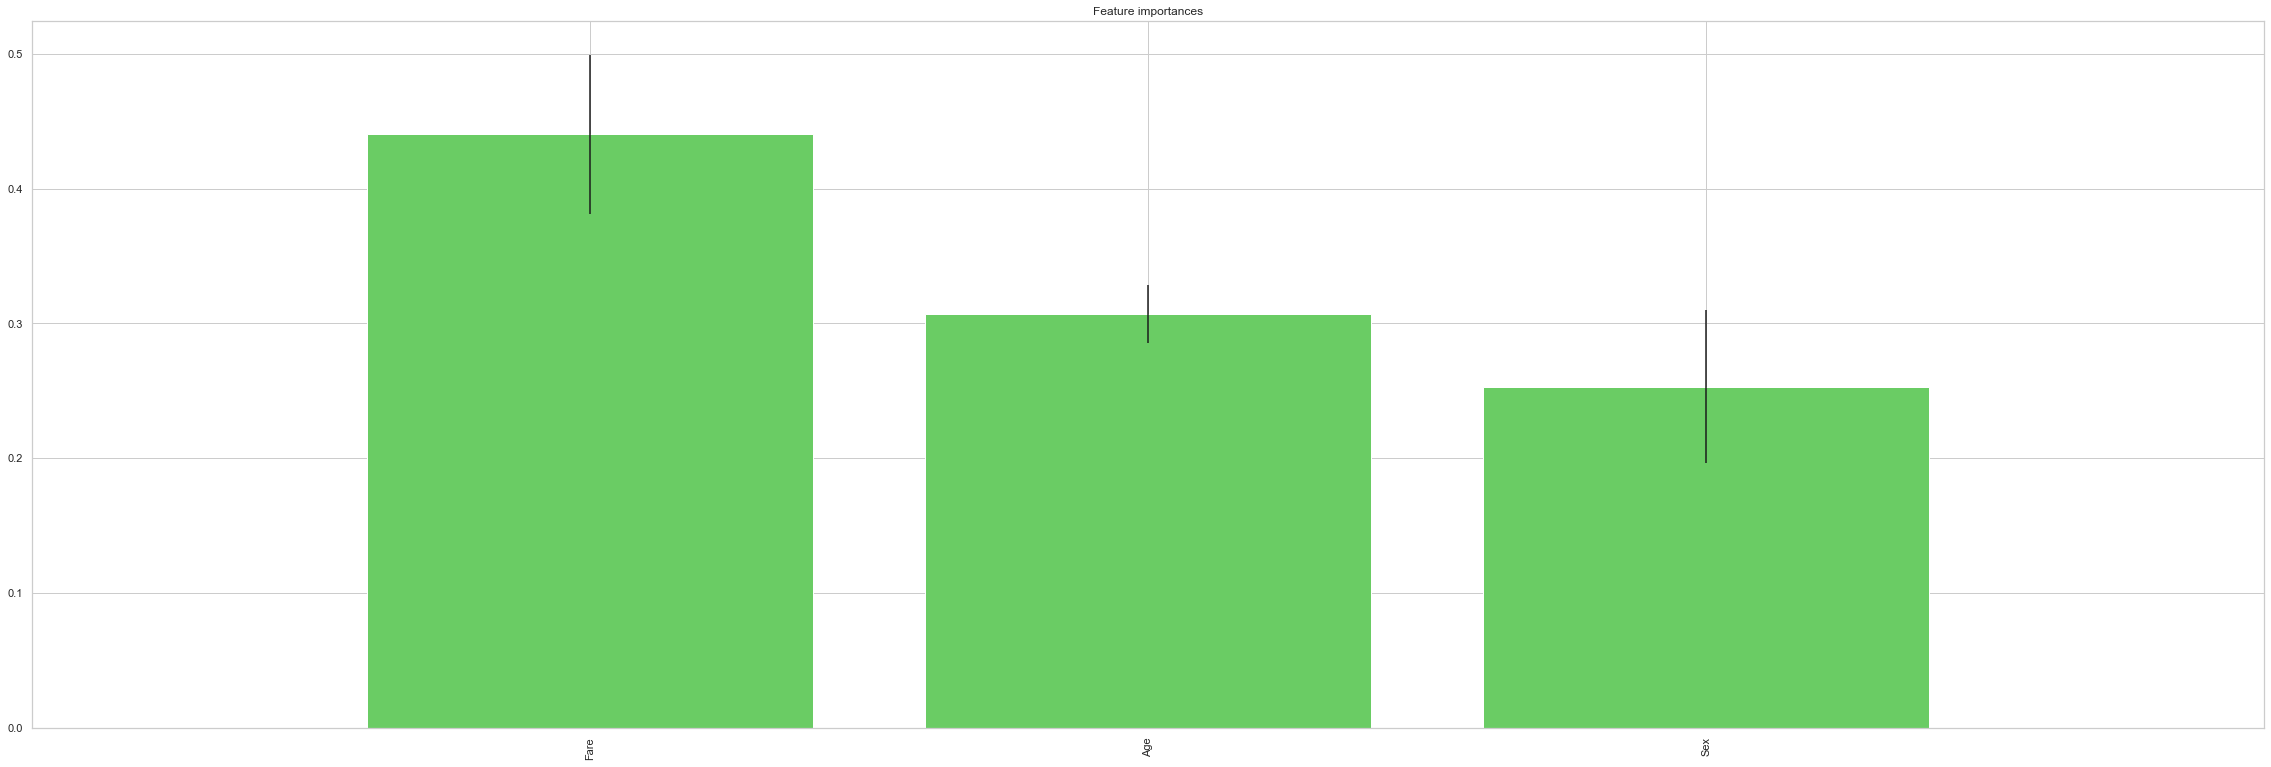

In [52]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X,y)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(40, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
drop_column = ["EmbarkedImputed","Pclass","FamilySize","IsAlone","CabinLvl"]
X.drop(drop_column, axis=1, inplace = True)

In [47]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [48]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [49]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
predTree = drugTree.predict(X_testset)

In [51]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(y_testset, predTree))

Precisión de los Arboles de Decisión:  0.7761194029850746
